In [1]:
import lzma
import pickle
import matplotlib.pyplot as plt
import numpy as np


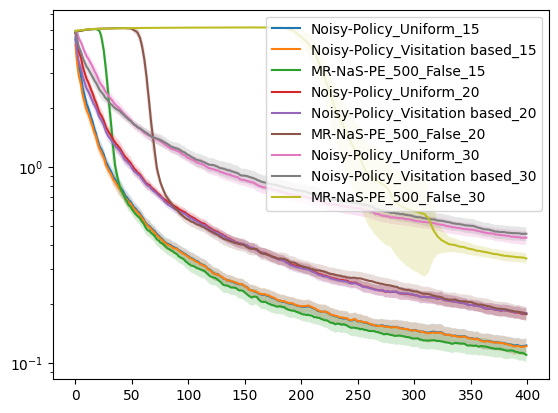

In [7]:
plt.figure()
for horizon in [250000]:
    for num_states in [15,20,30]:#,20,30]:
        results = []
        
        for agent in ['Noisy-Policy_Uniform', 
                      'Noisy-Policy_Visitation based',
                      #'MR-NaS-PE_500_False',
                      'MR-NaS-PE_500_False']:

            filename = f'{horizon}_Riverswim_{num_states}_{agent}.lzma'
            with lzma.open(f'./data/tabular/{filename}', 'rb') as f:
                res = pickle.load(f)
                results.append((agent, res))

        for agent_name, res in results:
            errors = np.linalg.norm(res['results'], ord=np.inf, axis=-1).max(-1)
            xvalues = np.arange(errors.shape[1])
            mu = errors.mean(0)
            ce = 1.96*errors.std(0, ddof=-1) / np.sqrt(errors.shape[0])
            plt.plot(xvalues, mu, label=agent_name + f'_{num_states}')
            plt.fill_between(xvalues, mu-ce, mu+ce, alpha=0.2)

plt.yscale('log')
plt.legend()